<a href="https://colab.research.google.com/github/jcdumlao14/My-Notes-ml-zoomcamp2022/blob/main/Week2_notes_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning for Regression**

## Project Plan

* Prepare data and do EDA(Exploratory Data Analysis)
* Use Linear Regression for predicting price
* Understanding the internals of Linear Regression - on how Linear Regression is implemented
* Evaluating the quality of our model using RMSE (Root Mean Squared Error)
* Feature engineering - creating new features and characteristics that we can use for our model.
* Regularization
* Tuning the model
* Using the model

# **Setup**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('fivethirtyeight')


# **Data Preparation** - video 2.2

In [ ]:
# reading the data
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500



* To get the URL of the file CSV and let's download the URL
* Use !wget for downloading or you can save as in your browser to get the dataset.
* Use pd.read_csv() function
* We want to predict MSRP(Manufacturer suggested retail price).
* Make a column's names consistent: make all lowercase and replace the blank with an underscore.



In [ ]:
# Lower cases all are column names and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# select only columns with string values
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [ ]:
# Lowercases and replaces spaces with underscores for values in all string columns of the dataframe
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [ ]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object


* Defined all string columns by using the dtypes function -to select all object,
* Determine what is object and what is not.
* Objects are the values and Index all the names of the columns


# **Exploratory Data Analysis** - video 2.3



In [ ]:
#Print some of the statistics of each column
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345


* Understand what the data look like and what kind of values are there.
* Use the unique method and it returns unique values in the series
* know how many unique values are there.


## Plot the Distribution of price(MSRP)

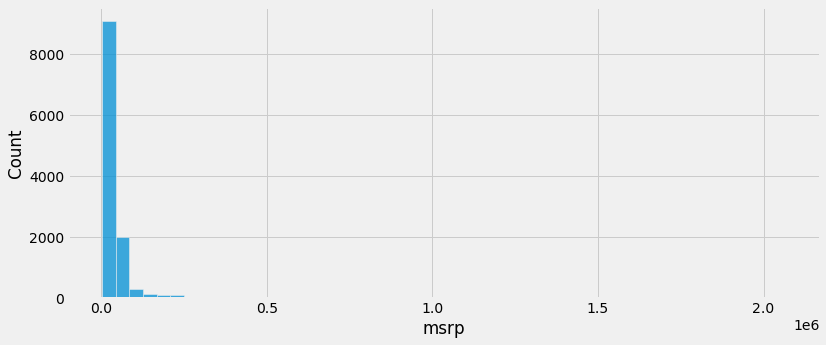

In [ ]:
sns.histplot(df.msrp,bins=50);


* The distribution of price to see how many different prices are there, cheap cars and expensive cars
* MSRP is a long-tail distribution
* We need to zoom out and zoom in a bit

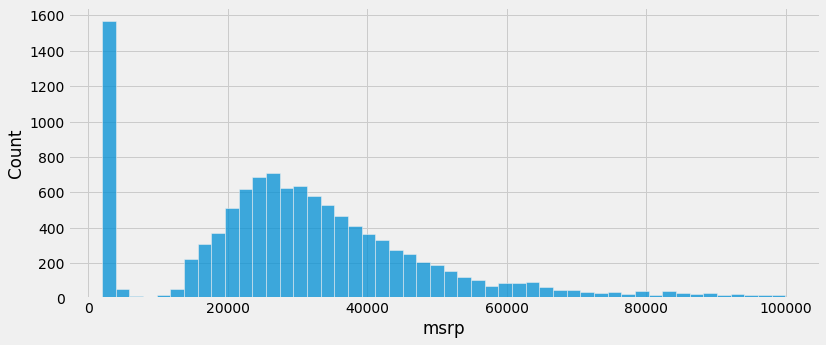

In [ ]:
sns.histplot(df.msrp [df.msrp < 100000],bins=50);

In [ ]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

In [ ]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


## Distribution of price

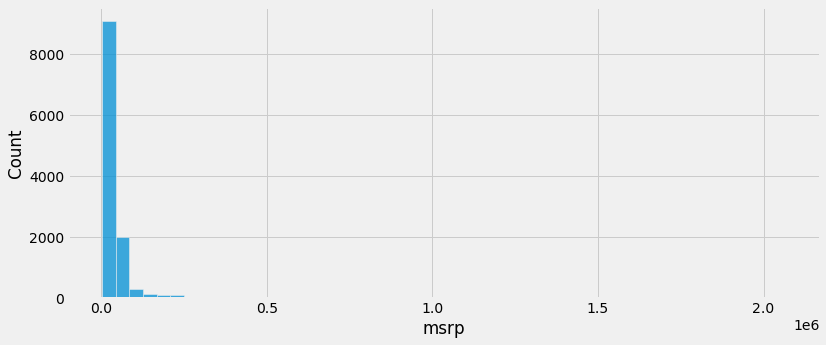

In [ ]:
sns.histplot(df.msrp, bins=50)


These long tail distributions are very common for price because there most of the things are cheap like for general the public, let's say but there are a few super expensive one there are not so many people who can afford to buy expensive ones that are why there are not so many, but there some people who can afford so far, those there is this like very few expensive ones, but for the rest of the population. we have cheaper cars this kind of distribution is not good for machine learning so this tail will confuse our model.

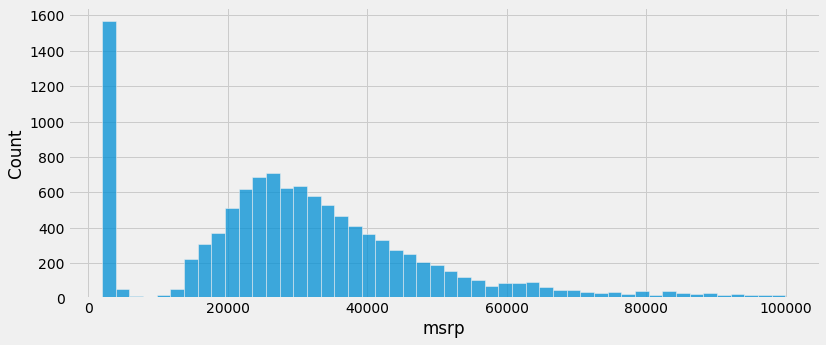

In [ ]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

* This kind of distribution is difficult for Machine Learning models.
* Use np.log1p, this function takes the log, but adds 1 before applying it.
* we want to get rid of the long tail and apply logarithm distribution.

In [ ]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [ ]:
np.log([0 + 1, 1+ 1, 10 + 1, 1000 + 1, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51292546])

In [ ]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

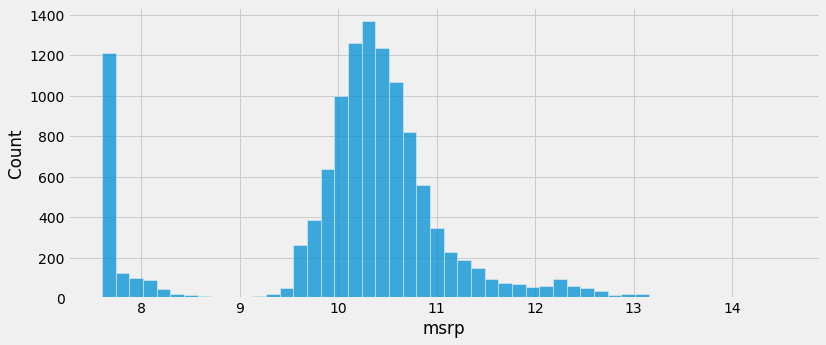

In [ ]:
sns.histplot(price_logs, bins=50)

* Now, We can see the average price in the plot.
* Shape now resembles bit this a bell curve shape called normal distribution even though looks like a weird peak.
* This distribution is the ideal model


## Missing values

In [ ]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# **Setting up the validation framework** - video 2.4

* Split data into three parts for 60% training, 20% test,and 60% validation
* To calculate how many 20% actually is
* Shuffle the data before splitting

Let's draw it

In [ ]:
#gets the number of rows in the DataFrame
n = len(df)

# calculate how many rows should go to train, validation, and test
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(f"n_train:{n_train}, n_val: {n_val}, n_test:{n_test}")

n_train:7150, n_val: 2382, n_test:2382


In [ ]:
n

11914

In [ ]:
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [ ]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [ ]:
# create a NumPy array with indices from 0 to(n-1), and shuffle it
idx = np.arange(n)
print(idx)

[    0     1     2 ... 11911 11912 11913]


In [ ]:
# fixed the random seed to make sure that the results are reproducible
np.random.seed(2)
np.random.shuffle(idx)
print(idx)

[2735 6720 5878 ... 6637 2575 7336]


In [ ]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [ ]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [ ]:
# check length of the three datasets
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [ ]:
# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [ ]:
# apply log to target y
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [ ]:
# delet msrp from dataframe
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [ ]:
len(y_train)

7150

* We need to remove this MSRP variable data frame for that we use the del operation and we need to delete it because we might accidentally use it and we want to avoid this and if we accidentally use this and then we will use the price variable as a feature for predicting price and our model will be perfect.

* We implemented this framework for validation manually.

# **Linear regression** - video 2.5

* Linear regression is a model that we use for solving regression problems - used for predicting numbers and the output of the model is a number.

In [ ]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [ ]:
# xi is a list with n elements
xi = [453, 11, 86]


In [ ]:
# w0 is the bias term and w is the n-dimensional vector of weights
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [ ]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [ ]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [ ]:
linear_regression(xi)

12.312

* w0 = 7.17 would be the predicted price
* The results are based on the log1p transformed data(to get the actual price we need to calculate np.exp(12.312)-1 = np.expm1(12.312)

In [ ]:
np.expm1(12.312)

222347.2221101062

In [ ]:
np.log1p(222347.2221101062)

12.312

# **Linear regression vector form** - video 2.6

In [ ]:
# dot product
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [ ]:
def linear_regression(xi):
  return w0 + dot(xi, w)

In [ ]:
# include w0 into w and use x0=1
w_new = [w0] + w

In [ ]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [ ]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [ ]:
linear_regression(xi)

12.312

In [ ]:
#w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [ ]:
# several samples
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = [x1, x2, x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [ ]:
#prediction for several samples
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [ ]:
def linear_regression(X):
    return X.dot(w_new)

In [ ]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# **Training a linear regression model** - video 2.7

* implement w = (XTX)-1 XT y

In [ ]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 1385],
    [172, 25, 201],
    [413, 11, 86],
    [148,  54, 1385],
    [38, 25, 2031],
    [453, 11, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24, 1385],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [ 148,   54, 1385],
       [  38,   25, 2031],
       [ 453,   11,   86]])

In [ ]:
# add bias term
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = np.column_stack([ones, X])

In [ ]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [ ]:
#XTX is a matrix-matrix multiplication, which we can do with the dot method
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [ ]:
w0 = w_full[0]
w = w_full[1:]

In [ ]:
w0, w

(12007.49622757822, array([   9.43467781, -145.37082047,    6.28239542]))

In [ ]:
def train_linear_regression(X, y):
  # adding the dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
  # normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

* Creates an array that contains only ones
* Adds the array of ls as the first columns of X
* Computes XTX and the inverse of XTX
* Computes the rest of the normal equation
* Splits the weight vector into bias and the rest of the weight

In [ ]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 1385],
    [172, 25, 201],
    [413, 11, 86],
    [148,  54, 1385],
    [38, 25, 2031],
    [453, 11, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24, 1385],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [ 148,   54, 1385],
       [  38,   25, 2031],
       [ 453,   11,   86]])

In [ ]:
train_linear_regression(X, y)

(12007.49622757822, array([   9.43467781, -145.37082047,    6.28239542]))

# **Car price baseline model**- video 2.8



In [ ]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [ ]:
# extract some features
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

In [ ]:
X_train = df_train[base].values

In [ ]:
# use function from the previous section
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [ ]:
# there are nan values, because the data contains a missing values
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [ ]:
# fill missing values with 0
X_train = df_train[base].fillna(0).values


In [ ]:
# use function from the previous section
w0, w = train_linear_regression(X_train, y_train)

# make predictions
y_pred = w0 + X_train.dot(w)


In [ ]:
w0

7.927257388069986

In [ ]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

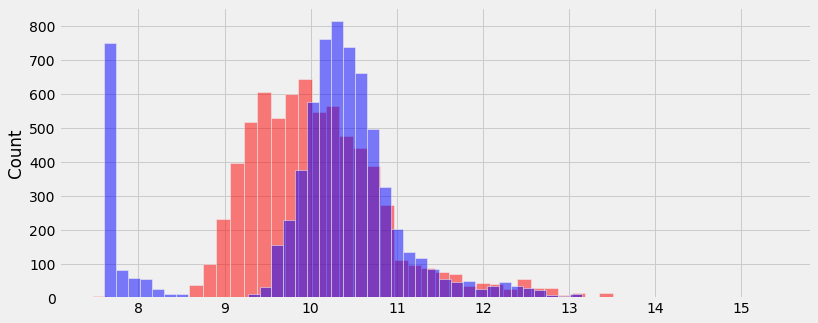

In [ ]:
# plot the predictions
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


* To build the baseline model
* Use the data frame to extract the numerical columns
* Let's build the model using these three features
* Train the linear regression
* Check the missing values - use 0 to replace the missing values


# **RMSE** - video 2.9

In [ ]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)

0.7554192603920132

* Compute the difference between the prediction
* Compute se (square error) and then calculate the mean
* Compute MSE and take the square root to get RMSE

# **Validating the model** - video 2.10


In [ ]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
# train the model
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Applies the model to validation dataset
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# computes RMSE on the validation data
rmse(y_val, y_pred)

0.761653099130156

This gives us a way to check whether any model adjustments lead to improvements in the predictive quality of the model.

# **Simple feature engineering** - video 2.11

* To improve the model
* To compute age, how old the car is.

In [ ]:
df_train.year.max()

2017

In [ ]:
# age of a car
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [ ]:
#create a copy of the input parameter to prevent side effects
def prepare_X(df):
    df = df.copy()
    
    # compute the age features
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5172055461058299

The model is improved and plots the predictions of the actual values

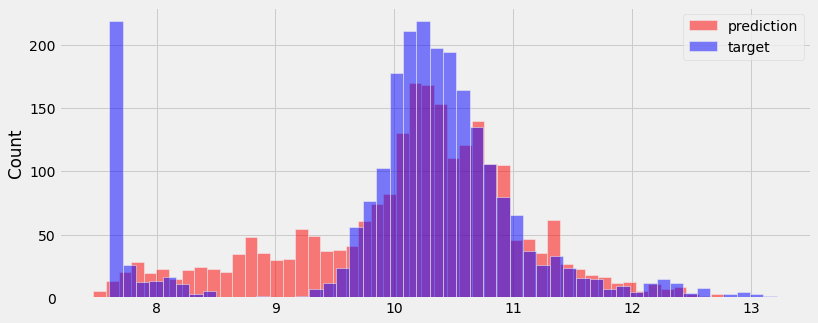

In [ ]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

# **Categorical variables** - video 2.12

In [ ]:
# Add a categorical variable: "num_of_door"
def prepare_X(df):
    df = df.copy() 
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    #Endcode the numbers of variables
    for v in [2, 3, 4]:
        df[f"num_doors_{v}"] = (df.number_of_doors == v).astype(int)
        features.append(f"num_doors_{v}")

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [ ]:
# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#prediction
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# validation
rmse(y_val, y_pred)

0.5157995641501678

In [ ]:
# how many different car types are there?
df.make.nunique()

48

In [ ]:
# most popular cars
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [ ]:
# Add a categorical variable: makes
def prepare_X(df):
    df = df.copy() 
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    #Endcode the numbers of variables
    for v in [2, 3, 4]:
        df[f"num_doors_{v}"] = (df.number_of_doors == v).astype(int)
        features.append(f"num_doors_{v}")

    for v in makes:
            df[f"make_{v}"] = (df.make == v).astype(int)
            features.append(f"make_{v}")

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [ ]:
# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#prediction
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# validation
rmse(y_val, y_pred)


0.5076038849556795

The results of prediction are improving

In [ ]:
# other categorical variables
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categories = {}

for c in categorical_columns:
    categories[c] = list(df_train[c].value_counts().head().index)

In [ ]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'tacoma'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [ ]:
# Add a categorical variable of 'num_of _doors
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df["age"] = 2017 - df.year
    features.append("age")

    #Endcode the numbers of variables
    for v in [2, 3, 4]:
        df[f"num_doors_{v}"] = (df.number_of_doors == v).astype(int)
        features.append(f"num_doors_{v}")

    for c, values in categories.items():
        for v in values:
            df[f"{c}_{v}"] = (df[c] == v).astype(int)
            features.append(f"{c}_{v}")
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [ ]:
# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#prediction
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# validation
rmse(y_val, y_pred)


82.83777025916584

In [ ]:
w0

-932835875671329.5

In [ ]:
w

array([-3.62144497e-01, -1.06659522e+01, -6.39894984e+00, -6.15464536e+00,
        1.52974723e-03, -3.97906457e+00, -7.89268478e+03, -7.92282753e+03,
       -7.89101964e+03,  1.04586070e+00, -2.31941244e+01, -1.26680582e+01,
       -4.11860790e+01, -1.23261318e+01, -3.97391208e+00,  8.87219454e+00,
        6.60591192e+00, -1.56575790e+01,  3.43239069e+02, -1.68728767e+02,
       -1.43523369e+02, -1.58367750e+02, -1.78062292e+02, -2.38233427e+02,
        9.32835876e+14,  9.32835876e+14,  9.32835876e+14,  9.32835876e+14,
       -2.94149220e-01, -3.00185009e+00,  2.81964860e+00,  1.31754126e+01,
        5.66683406e+00,  1.09112994e+02,  8.78342987e+01,  1.21890942e+02,
       -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
       -2.90235596e-01])

# **Regularization** - video 2.13

* It may happen that the matrix XTX contains duplicate columns

In [ ]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5],
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [ ]:
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

* Second and third columns have the same values and the inverse of this matrix does not exist

In [ ]:
np.linalg.inv(XTX)

LinAlgError: ignored

In [ ]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [ ]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

* Now as we can see the columns have no duplicates 

In [ ]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

In [ ]:
XTX_inv

array([[ 4.92227853e+00, -1.00706720e-02, -4.75068503e-02,
        -1.38596093e-03],
       [-1.00706720e-02,  2.29591423e-05,  7.36287617e-05,
         3.06770651e-06],
       [-4.75068503e-02,  7.36287617e-05,  1.23818920e-03,
         1.36204354e-06],
       [-1.38596093e-03,  3.06770651e-06,  1.36204354e-06,
         6.56917929e-07]])

* The weight gets high values
* Apply this to some values of y

In [ ]:
y = [1,2,3,1,2,3]
XTX_inv.dot(X.T).dot(y)

In [ ]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [ ]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [ ]:
XTX = XTX + 0.01 * np.eye(3)

In [ ]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])



* After adding the small number to the diagonal, the weights are smaller
* This could help, that the matrix is not singular anymore, this is called regularization.
* Modify the training function

In [ ]:
#controls the amount of regularization by using parameter r
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0]) #Add r to main diagonal XTX

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4608208286385144

* The error is much smaller, than the non-regularized regression
* Now we need to find the best regularization parameter (r)

# **Tuning the model** - video 2.14

* Finding the best value of r
* To print the regularization parameter

In [ ]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(f"r:,{r}, w0: {w0}, score:{score}")
    

r:,0.0, w0: -932835875671329.5, score:82.83777025916584
r:,1e-05, w0: 8.09618142888737, score:0.46081530426411305
r:,0.0001, w0: 7.1303586046951, score:0.4608153652024511
r:,0.001, w0: 7.13087408161861, score:0.46081585844175094
r:,0.1, w0: 7.000232420058528, score:0.4608736549089936
r:,1, w0: 6.250747847004844, score:0.46158128382759855
r:,10, w0: 4.729512585675707, score:0.472609877267077


* r = 0.01 it seems to be a good value and the RMSE starts increasing

In [ ]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.46081585844175094

# **Using the model** - video 2.15

* Train the final model on train and validation set
* Test the model on the test data
* To apply the exponential function

In [ ]:
#combine train and validation
df_full_train = pd.concat([df_train, df_val])

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
X_full_train = prepare_X(df_full_train)

In [ ]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [ ]:
y_full_train = np.concatenate([y_train, y_val])

In [ ]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [ ]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(f"score:{score}")


score:0.4600753969691607


RMSE is very similar to the test set


Apply this model to a specific car

In [ ]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

Prepare_X function needs a data frame as input

In [ ]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [ ]:
X_small = prepare_X(df_small)
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [ ]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.632492518147435

In [ ]:
# compare with y_test
y_test[20]

10.463131911491967

In [ ]:
# model prediction
np.expm1(y_pred)

41459.33716062769

In [ ]:
# real price
np.expm1(y_test[20])

35000.00000000001

This is the predicted price which is also close to the original price